# Project 1: Data Analysis

The extent of analysis of a dataset is largely up to the analyst. There is much subjectivity when deciding how to explore a dataset. How much is too much exploration, to a point where you are not getting any information from some charts? What if you do not explore enough, will you miss key patterns and correlations between variables?

For Project 1 exploration, since we are relatively new to analyzing your data, I will give you exactly what I need from your analysis. If you do the minimum exploration I have listed here, then you will get a 87%-90% on this portion of the project. If you add more insightful analysis on your own, you will get an A.

## Basics of Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1= pd.read_csv('/content/drive/MyDrive/CVA/Project1/students_mental_health_survey.csv')

In [4]:
#Find the size of your dataset (number of features and observations)

num_observations, num_features = data1.shape
print('Number of observations:', num_observations)
print('Number of features:', num_features)

Number of observations: 7022
Number of features: 20


In [5]:
#Add summary statistics of your dataset here
summary_stats = data1.describe()
print(summary_stats)

               Age        CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
count  7022.000000  7010.00000   7022.000000       7022.000000    7022.000000   
mean     23.003418     3.49127      2.427941          2.254486       2.300484   
std       3.853978     0.28742      1.638408          1.625193       1.624305   
min      18.000000     2.44000      0.000000          0.000000       0.000000   
25%      20.000000     3.29000      1.000000          1.000000       1.000000   
50%      22.000000     3.50000      2.000000          2.000000       2.000000   
75%      25.000000     3.70000      4.000000          3.000000       4.000000   
max      35.000000     4.00000      5.000000          5.000000       5.000000   

       Financial_Stress  Semester_Credit_Load  
count       7022.000000           7022.000000  
mean           2.453005             22.010538  
std            1.708995              4.358380  
min            0.000000             15.000000  
25%            1.000000       

# Distribution of Dataset
### Box plot:

*A box plot, also known as a whisker plot, is a graphical representation of a dataset's five-number summary: the minimum, lower quartile (Q1), median, upper quartile (Q3), and maximum. It provides a way to visualize the distribution and spread of the data.*


 1. This particular graph shows how involvement in extracurricular activities has numerous advantages that might help you manage your stress levels.Participating in extracurricular activities offers a beneficial treatment for stress, promotes social relationships, increases self-confidence, and imparts practical time management skills, all of which help with stress management and general wellbeing.

[Text(0.5, 1.0, 'Stress level vs Extracurricular Involvement')]

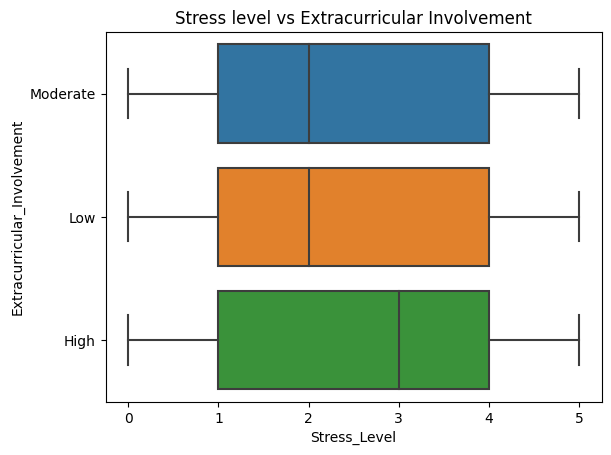

In [6]:
#Add at least one box and whisker plot of an important numerical variable in your table
sns.boxplot(x=data1['Stress_Level'],y= data1['Extracurricular_Involvement']).set(title='Stress level vs Extracurricular Involvement')

## Correlation
2. Correlation measures the strength and direction of a linear relationship between two variables; it quantifies how changes in one variable correspond to changes in another, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

In [7]:
#Add a correlation matrix of all your numerical variables and give written
#anlaysis of any variables that show strong correlation
corr= data1.corr()
corr

<ipython-input-7-61d000ee421b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data1.corr()


,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
Age,1.000000,0.014599,-0.019901,0.000225,0.008618,-0.002008,0.005908
CGPA,0.014599,1.000000,0.005143,-0.023100,0.003504,-0.011488,-0.004284
Stress_Level,-0.019901,0.005143,1.000000,-0.043313,-0.035802,-0.001388,-0.005558
Depression_Score,0.000225,-0.023100,-0.043313,1.000000,-0.018019,-0.012590,0.024234
Anxiety_Score,0.008618,0.003504,-0.035802,-0.018019,1.000000,-0.003994,0.010819
Financial_Stress,-0.002008,-0.011488,-0.001388,-0.012590,-0.003994,1.000000,-0.003203
Semester_Credit_Load,0.005908,-0.004284,-0.005558,0.024234,0.010819,-0.003203,1.000000


<Axes: >

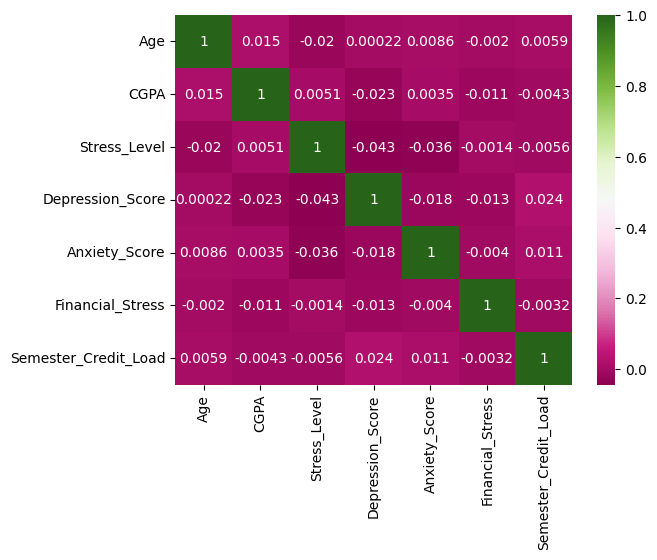

In [8]:
sns.heatmap(corr, cmap="PiYG", annot=True)

## Histogram

*A histogram is a graphical representation of the distribution of a dataset. It uses bars to represent the frequency of data within specific intervals, providing a visual overview of the data's underlying pattern and allowing for insights into its shape, center, and spread*

3. This graph demonstrates how stress connected to job and life changes affects younger persons more frequently than stress related to health problems or financial worries affects older adults. Furthermore, coping skills tend to get better with age, potentially reducing stress reactions.

Stress level here ranges from 0 to 5 and we can see the distribution of each by age.


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>]],
      dtype=object)

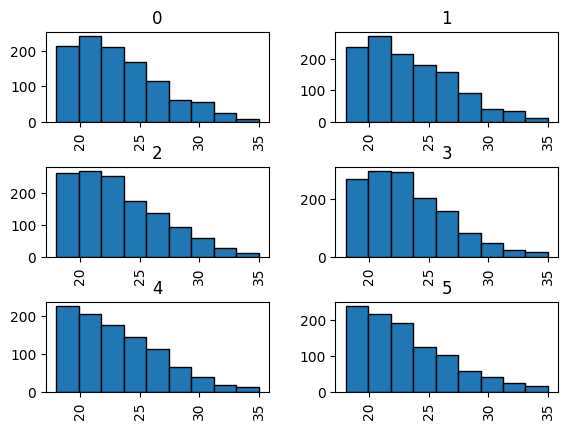

In [9]:
#BONUS: You can create a histogram to show distribution of a numerical variable
data1.hist(column="Age", by="Stress_Level", bins= 9, edgecolor = "black")

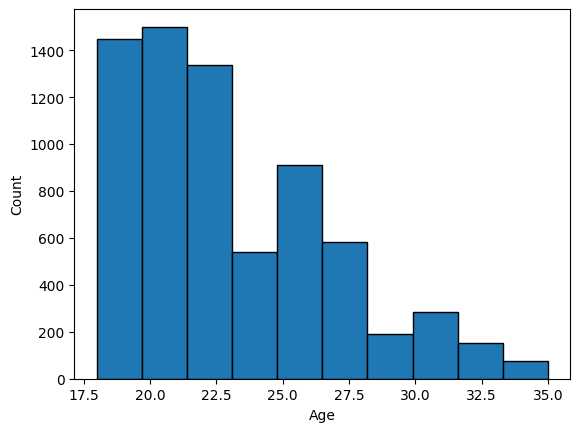

In [10]:
x= data1['Age']
plt.hist(x, density=False, bins=10,edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Age');

#Aggregation of Categorical Data
## Bar Plot

*A bar plot is a visual representation of categorical data using rectangular bars.It is simple to compare multiple groups and identify patterns or trends in the data since the length of each bar reflects the frequency or proportion of the categories.*



4. Stress levels can vary based on gender due to societal, biological, and psychological factors. Women often report higher stress due to multiple roles, while men might experience stress related to work or financial pressures. However, individual responses to stress are highly diverse and influenced by various personal factors.


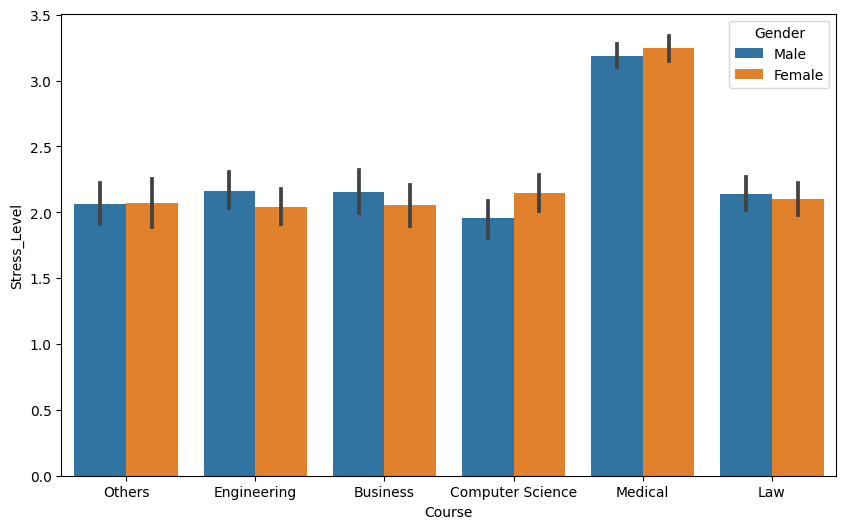

In [11]:
#Create either a bar chart or pie chart of the sum of one numerical value in
#relation to one categorical variable (i.e. sum of sales for each category of product)
fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.barplot(x='Course', y='Stress_Level', hue='Gender', data=data1)

##Stacked Bar Plot
5. This stacked bar graph illustrates how different living situations can affect stress levels. Living with supportive family members can lessen stress by offering emotional and practical help, whereas living alone might raise stress owing to a lack of social and emotional support, underscoring the important influence of family presence on stress levels.

<Axes: xlabel='Stress_Level', ylabel='Count'>

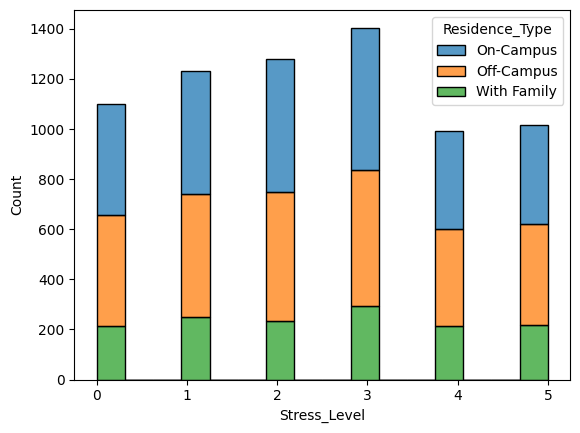

In [12]:
#Create either a bar chart or pie chart of the sum of one numerical value in
#relation to one categorical variable (i.e. sum of sales for each category of product)
sns.histplot(data1, x="Stress_Level", hue="Residence_Type", multiple="stack")

##Pie Chart
*A pie chart is a circular graph divided into sectors, each representing a proportion of a whole. It visually illustrates the composition of a dataset, making it easy to understand the relative size or percentage of each category in relation to the total.*



6. Stress levels are greatly influenced by the nature of a course, including workload, difficulty, and deadlines. Stress can be increased by difficult coursework or overbearing academic pressure, but supportive, well-balanced learning environments can assist reduce stress by encouraging productive coping mechanisms and a sense of accomplishment. The distribution of how a course impacts stress levels is depicted in the following pie chart.

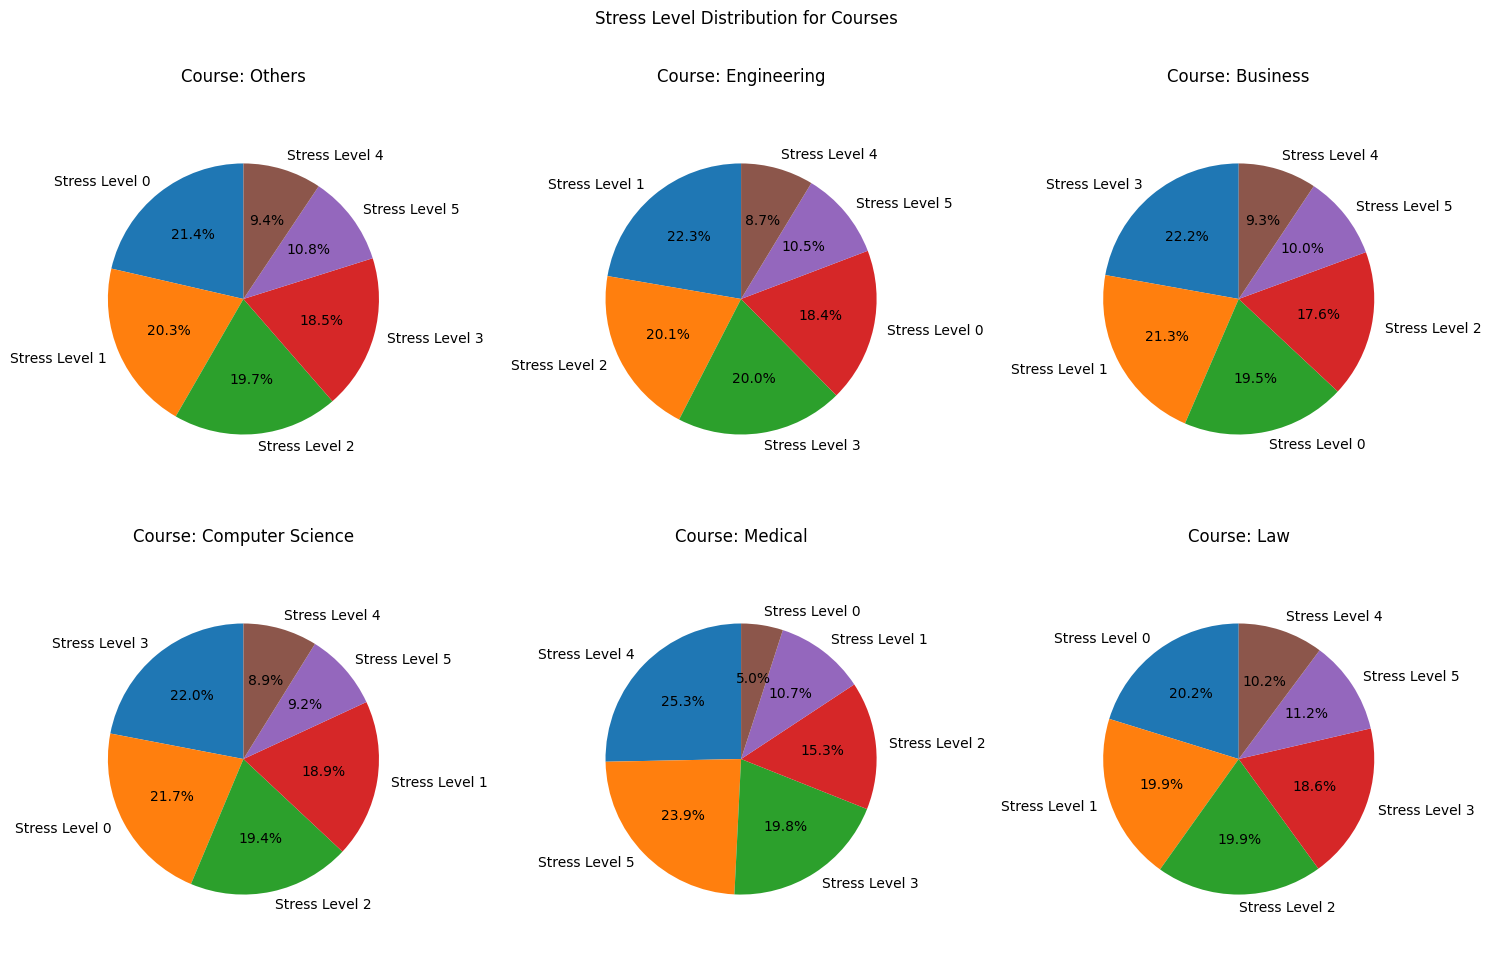

In [13]:
#Piecharts
stress_levels = data1['Stress_Level'].unique()

num_courses = len(data1['Course'].unique())
num_rows = (num_courses - 1) // 3 + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle('Stress Level Distribution for Courses')

for i, (course, ax) in enumerate(zip(data1['Course'].unique(), axes.flatten())):
    course_df = data1[data1['Course'] == course]
    stress_counts = course_df['Stress_Level'].value_counts()

    labels = [f'Stress Level {level}' for level in stress_counts.index]
    sizes = stress_counts.values

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'Course: {course}')

for i in range(num_courses, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()


7.
Stress can lead to substance use as individuals may turn to substances like alcohol or drugs in an attempt to cope, seeking temporary relief from stressors. This pie chart depicts what percentage of people have turned to use anykind of substance.


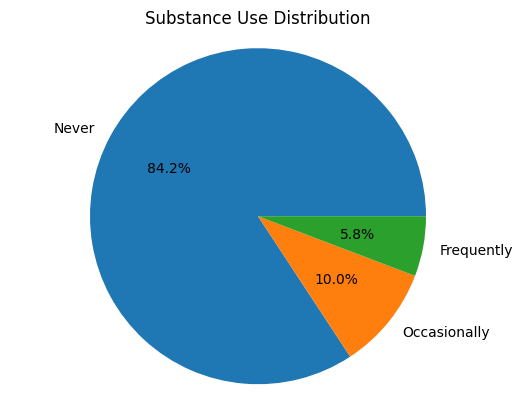

In [14]:
#Piechart
substance_use_counts = data1['Substance_Use'].value_counts()
plt.pie(substance_use_counts, labels=substance_use_counts.index, autopct='%1.1f%%', colors=sns.color_palette( ))
plt.title('Substance Use Distribution')
plt.axis('equal')
plt.show()

#Pairplot
##Diagonal Plots (Kernel Density Estimates - KDE):
Each diagonal plot shows the distribution of a single variable. The KDE plot provides a smooth estimate of the probability density function of the variable.The KDE plots give you insights into the data distribution and can help identify whether the variable follows a particular pattern or distribution (e.g., normal distribution).

##Off-Diagonal Scatter Plots:

The off-diagonal elements of the pair plot are scatter plots that display the relationships between pairs of variables.Each point in the scatter plots represents an observation (data point) in your dataset.


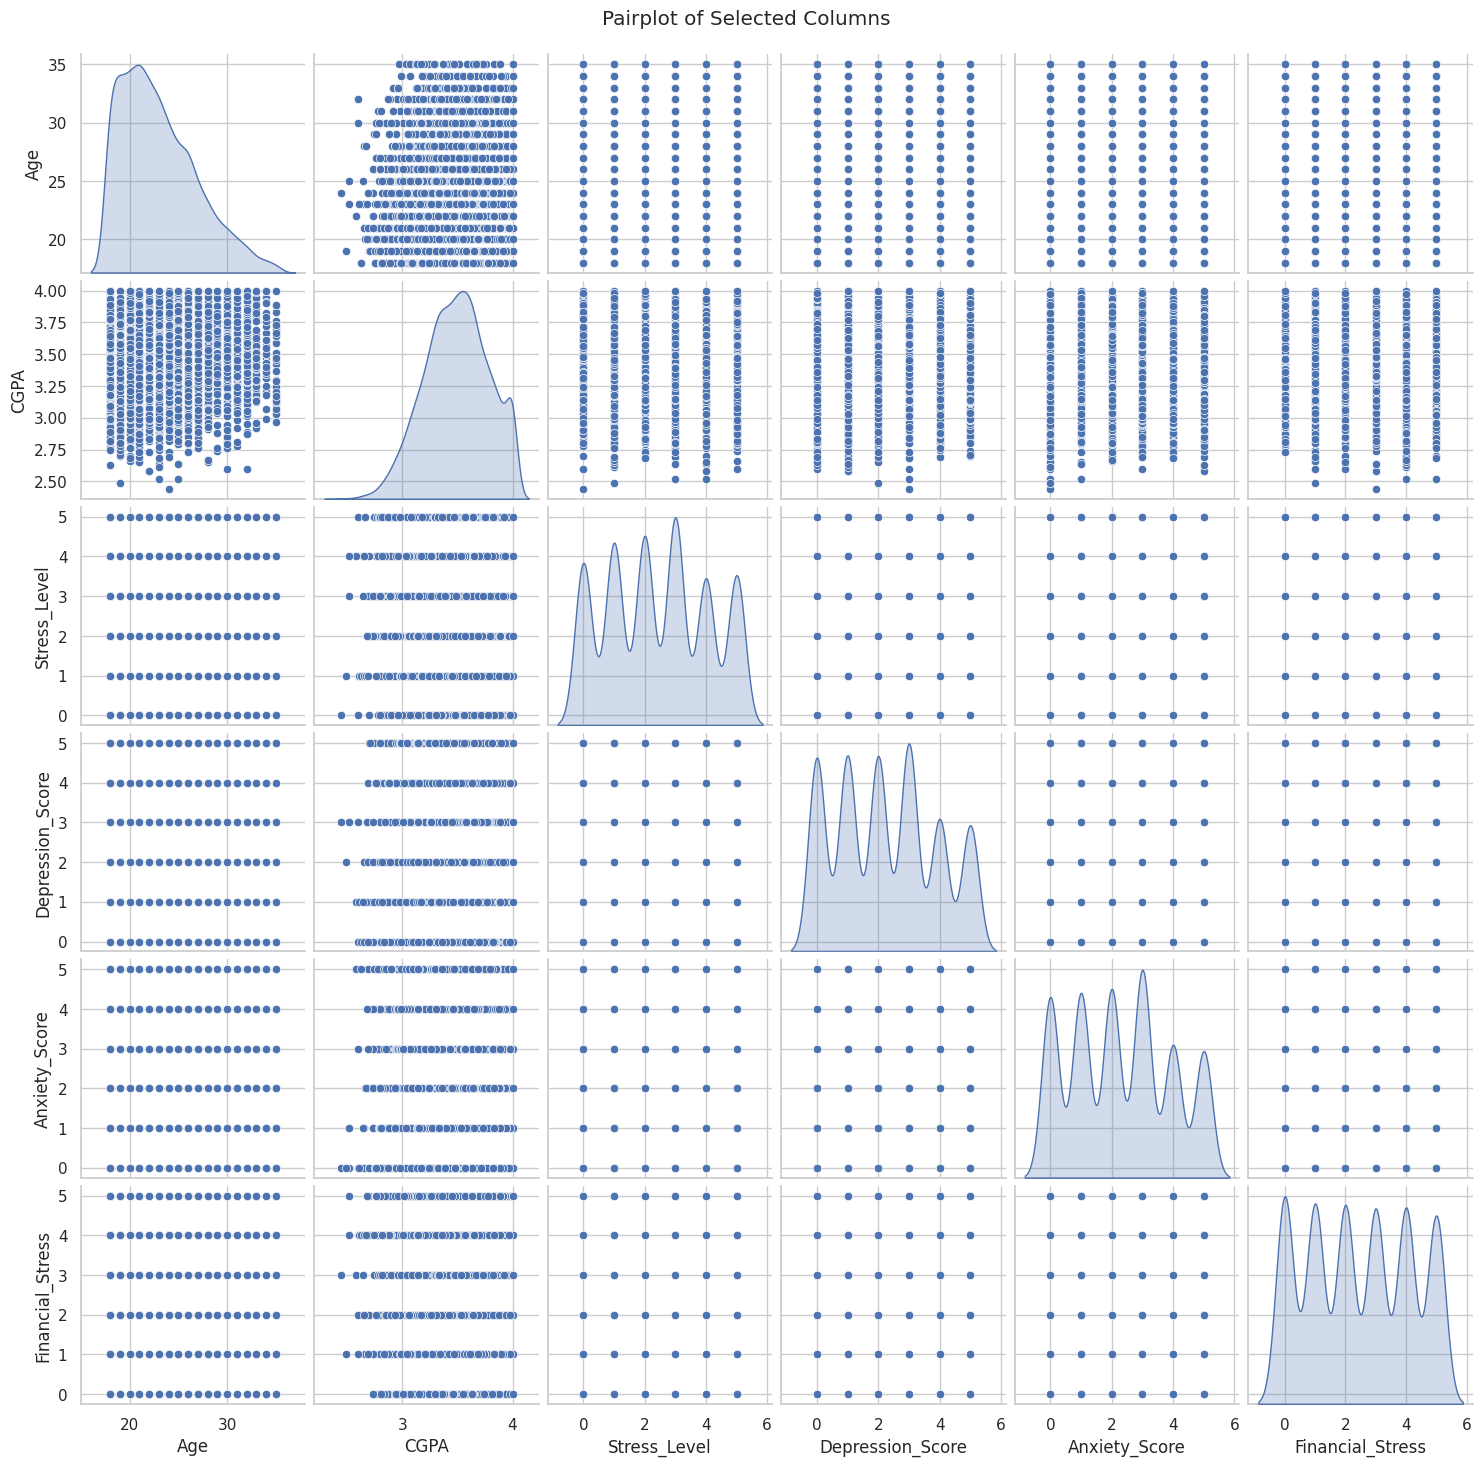

In [16]:
#BONUS: Create a scatterplot with more than 2 visual encodings
#Pairplot
columns_for_pairplot = ['Age', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress']
sns.pairplot(data1[columns_for_pairplot], diag_kind='kde')
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairplot of Selected Columns')
plt.show()